In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image
%matplotlib inline

In [3]:
img_width, img_height = 224, 224
data_dir = "/home/pi/Documents/Teach_machine_learning/flower_photos"
batch_size = 8
epochs = 10
nb_train_samples = 3000
nb_validation_samples = 300

In [4]:
# import a model trained with Imagenet
model = keras.applications.mobilenet.MobileNet(input_shape=(img_width, img_height, 3), alpha=0.5,
                                               include_top=False, weights='imagenet')

In [5]:
# Freeze the layers which you don't want to train.
for layer in model.layers:
    layer.trainable = False

In [6]:
#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(5, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)
#model_final.summary()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# compile model
model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = keras.optimizers.adam(lr=0.0001),
                    metrics=["accuracy"])

In [15]:
datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = datagen.flow_from_directory(data_dir, 
                                              target_size=(img_width, img_height), 
                                              shuffle=True, seed=13,
                                              class_mode='categorical', 
                                              batch_size=batch_size)
validation_generator = datagen.flow_from_directory(data_dir, 
                                              target_size=(img_width, img_height), 
                                              shuffle=True, seed=13,
                                              class_mode='categorical', 
                                              batch_size=batch_size)

Found 3670 images belonging to 5 classes.
Found 3670 images belonging to 5 classes.


In [11]:
# Save the model according to the conditions  
checkpoint = ModelCheckpoint("transfer_mobilenet_split.h5", monitor='val_acc', verbose=1, save_best_only=True, 
                             save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [12]:
# Train the model 
model_final.fit_generator(
    train_generator,
    epochs = epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validation_generator,
    nb_val_samples = nb_validation_samples,
    callbacks = [checkpoint, early])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=375, epochs=10, callbacks=[<keras.ca..., validation_steps=300)`
  


Epoch 1/10
375/375 [==============================] - 2254s - loss: 1.4383 - acc: 0.4680 - val_loss: 0.5912 - val_acc: 0.8037
Epoch 2/10
375/375 [==============================] - 2566s - loss: 1.0289 - acc: 0.6050 - val_loss: 0.4908 - val_acc: 0.8274
Epoch 3/10
375/375 [==============================] - 2506s - loss: 0.9539 - acc: 0.6279 - val_loss: 0.5315 - val_acc: 0.8111
Epoch 4/10
375/375 [==============================] - 2471s - loss: 0.8839 - acc: 0.6690 - val_loss: 0.4861 - val_acc: 0.8313
Epoch 5/10
375/375 [==============================] - 2363s - loss: 0.8726 - acc: 0.6712 - val_loss: 0.4302 - val_acc: 0.8470
Epoch 6/10
375/375 [==============================] - 2008s - loss: 0.8278 - acc: 0.6903 - val_loss: 0.4531 - val_acc: 0.8399
Epoch 7/10
375/375 [==============================] - 1871s - loss: 0.7995 - acc: 0.7014 - val_loss: 0.4268 - val_acc: 0.8417
Epoch 8/10
375/375 [==============================] - 1929s - loss: 0.8046 - acc: 0.6973 - val_loss: 0.4363 - val_acc:

In [9]:
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model_final = load_model('transfer_mobilenet_split.h5')
    

(224, 224, 3)


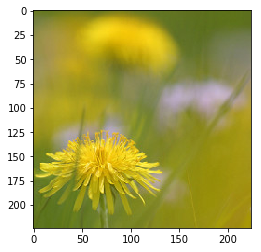

In [37]:
#IM = Image.open(data_dir + '/sunflowers/20407896403_a50fef58ac_n.jpg')
#IM = Image.open(data_dir + '/daisy/2641151167_3bf1349606_m.jpg')
#IM = Image.open(data_dir + '/tulips/3150964108_24dbec4b23_m.jpg')
#IM = Image.open(data_dir + '/roses/3634244527_e72c47842c_n.jpg')
IM = Image.open(data_dir + '/dandelion/14060367700_fe87e99b6a_m.jpg')

npim = np.array(IM.resize((img_height, img_width), Image.NEAREST))
print(npim.shape)
plt.imshow(npim)
npim = npim.reshape((1,img_height, img_width,3))/255.0

[  3.08370392e-04   9.99653459e-01   2.43296336e-06   3.29769864e-05
   2.76349988e-06]


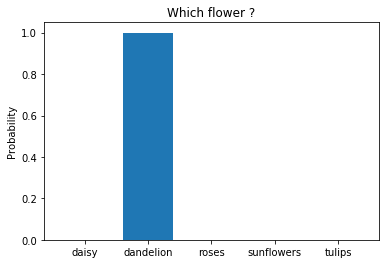

In [38]:
prob = model_final.predict(npim)
print(prob[0,:])
labels = ('daisy', 'dandelion', 'roses', 'sunflowers', 'tulips')
y_pos = np.arange(len(labels))
plt.bar(y_pos, prob[0,:])
plt.xticks(y_pos, labels)
plt.ylabel('Probability')
plt.title('Which flower ?')
 
plt.show()